In [1]:
import local_models.local_models
import local_models.algorithms
import local_models.utils
import local_models.linear_projections
import local_models.loggin
import local_models.TLS_models
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.cluster
from importlib import reload
from ml_battery.utils import cmap
import matplotlib as mpl
import sklearn.datasets
import sklearn.decomposition
import logging
import ml_battery.log
import time
import os


logger = logging.getLogger(__name__)

#reload(local_models.local_models)
#reload(lm)
#reload(local_models.loggin)
#reload(local_models.TLS_models)
np.warnings.filterwarnings('ignore')


In [2]:
mpl.rcParams['figure.figsize'] = [8.0, 8.0]

In [3]:
K=24
n = 200
noise=.06
SEED = 1
np.random.seed(SEED)
KERNEL=local_models.local_models.GaussianKernel
noisy_moons, c = sklearn.datasets.make_moons(n_samples=n, noise=noise)

In [4]:
project_dir = "../data/moons"
os.makedirs(project_dir, exist_ok=1)

In [5]:
linear_models = local_models.local_models.LocalModels(local_models.TLS_models.LinearODR_mD(1))
linear_models.fit(noisy_moons)

In [26]:
bandwidth = 1
k = 4
data = noisy_moons
range_pct = 0.1
grid_steps = 100

data_mins, data_maxes, data_ranges = local_models.linear_projections.min_max_range(data)
graph_bounds = local_models.linear_projections.sane_graph_bounds(data_mins, data_maxes, data_ranges, range_pct)

grid = local_models.utils.get_global_grid(data, outside_range_pct=range_pct, n_steps=grid_steps)
gridder = local_models.utils.Grid2Vec()
grid = gridder.fit_transform(grid)

for tls_shifted in local_models.algorithms.local_tls_shift_till_convergence(linear_models, grid,
                                     kernel=KERNEL(bandwidth=bandwidth)):
    pass

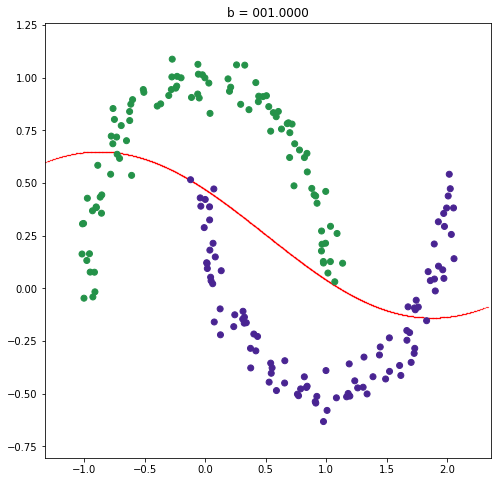

In [27]:
plt.scatter(tls_shifted[:,0],tls_shifted[:,1],c='r',s=0.01,marker='.')
#local_models.linear_projections.plt_local_odr_lines(lines)
plt.scatter(noisy_moons[:,0], noisy_moons[:,1],c=cmap(c))
local_models.linear_projections.plt_prettify("b = {:08.04f}".format(bandwidth), graph_bounds)
plt.savefig(os.path.join(project_dir, "converged_b_{:08.04f}.png".format(bandwidth)))